# Tutorial Para Criação de Relatórios Dinâmicos Em PDF Através de Scripts Python

## Bibliotecas Utilizadas:

In [1]:
#Criado por Carlos Vinícius dos Santos (@Carlos1999)
#imports
import pandas as pd
import pdfkit
from datetime import datetime
from pathlib import Path
import os
import seaborn as sns

## Realizando a Leitura e filtragem de Dataset Para Usarmos Como Base do Relatório

In [2]:
# realizando leitura do csv com pandas armazenando em dataframe
df_iris = pd.read_csv("Relatorios\Dataset Iris Testes\iris.csv")
# renomeando colunas para melhor manipulação no futuro
df_iris.columns = [colum.replace(".","_") for colum in list(df_iris.columns)]
df_iris.head(4)



,sepal_length,sepal_width,petal_length,petal_width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa


In [3]:
# parâmetro para filtragem
especie = "Setosa"

In [4]:
# filtra usando o parâmetro 
if(especie != ""):
    df_iris = df_iris[df_iris.variety == especie]


## Configuração do Relatório e Corpo Base

In [5]:
# Local base de onde será salvo o relatório
home = str(Path.home())

#definições do PDF, page-size A4 paga o tamanho, Landscape para orientação horizontal e quiet para que não gere prints após a criação do relatório
options={'page-size':'A4','orientation':'Landscape','quiet': ''}
# local onde está salvo o .exe do criador de pdf
path_wkhtmltopdf = r'C:\Program Files\wkhtmltopdf\bin\wkhtmltopdf.exe'
# passando configuração para pdfkit
config = pdfkit.configuration(wkhtmltopdf=path_wkhtmltopdf)
path_bot = os.getcwd()
# local onde está salvo o arquivo cssS
css = ('./Relatorios/styles/style_tutorial.css')

In [6]:
#  Cria Pasta ----------------------------------------------------------------------------------------------------------------------------------------------------------
# cria a pasta onde será armazenado o relatório, usando a data de hoje como complemento do nome da pasta, para ser gerada uma pasta para cada dia, criando um log
try:
    data = datetime.now().date().strftime('%d-%m-%Y')
    os.mkdir('./Relatorios/Relatorios/Relatorio_tutorial '+data)
except Exception as e:
    print(e)

In [7]:
##layout base para pdf
html = '''<!doctype html>
        <html lang="ptbr">
        <head>
            <title>Relatório </title>
            <meta name="description" content="Relatório ">
            <meta name="author" content="Carlos Vinícius">
            <meta charset="utf-8">
            
        </head>
        <body align='center'>'''

resumo =  '''
        <p id='texto'>{0}</p>
        '''.format("TEXTO INICIAL PARA RELATÓRIO TUTORIAL <br> TEXTO INICIAL PARA RELATÓRIO TUTORIAL <br> TEXTO INICIAL PARA RELATÓRIO TUTORIAL <br> TEXTO INICIAL PARA RELATÓRIO TUTORIAL")

fim = "<body></html>"

## Conteúdo do Relatório

### Inserindo Imagem no Relatório

Setosa    50
Name: variety, dtype: int64


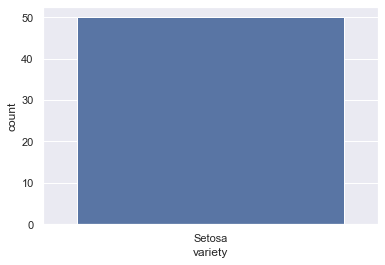

In [8]:
# Cria Gráfico simples para visualização dos dados e para ser inserido no relatório
sns.set_theme(style="darkgrid")
print(df_iris.variety.value_counts())
ax = sns.countplot(x="variety", data=df_iris)
caminho_imagem = r"Relatorios\figuras\tutorial_grafico_countplot.png"
ax.get_figure().savefig(caminho_imagem,dpi = 300)

caminho_absoluto_imagem = path_bot'\\'+caminho_imagem

# Pega data para colocar no título
data_titulo = datetime.now().strftime('%d/%m/%Y, AS %Hh%M')

# criando html com a imagem
imagem_countplot = f""" <div id = "divTitulo"> <p id = "pTituloImagemCountplot" > TITULO DA IMAGEM. DATA DA CONSULTA {data_titulo}</p> <img src='{caminho_absoluto_imagem}' id = 'imagem_countplot' alt='RN'> </div>"""

## Inserindo Tabela no Relatório

In [9]:
# quebra de páginas entre imagem e tabela
quebra_de_paginas = """<div style = "display:block; clear:both; page-break-after:always;"></div>"""

# Cria cabeçalho da tabela em HTML que será inserida no relatório
tabela_1 = f"""<div id = "divTitulo" style = "top:0px"> <p id = "pTitulo" > TÍTULO DA TABELA. DATA DA CONSULTA {data_titulo}</p> </div> <table class="paleBlueRows"  width="1300px" ><thead> <th> Nº </th> <th width="200px"> SEPAL LENGTH </th> <th > SEPAL WIDTH </th>  <th> PETAL LENGTH </th> <th > PETAL WIDTH </th>  <th > VARIETY </th>   </thead>"""
contador = 1
for row in df_iris.itertuples():
    tabela_1 += f""" <tr> <td> {contador} </td> <td> {row.sepal_length} </td> <td> {row.sepal_width} </td> <td> {row.petal_length} </td> <td> {row.petal_width} </td> <td> {row.variety} </td> </tr>"""
    contador += 1

In [10]:
# Cria conteúdo da tabela
tabela_1 += "</table>"

## Gerando PDF com a junção do Corpo Base Com o Conteúdo

In [11]:
# Gerando PDF juntando todos os HTML criados
# O pdf será gerado nesse caminho
caminho,arquivo = path_bot+f'\\Relatorios\\Relatorios\\Relatorio_tutorial {data}\\','relatório_tutorial.pdf'
pdfkit.from_string(html+resumo+imagem_countplot+quebra_de_paginas+tabela_1+fim,caminho+arquivo,css=css,configuration=config,options=options)
print("Gerado corretamente!")
# Retornando caminho e nome do arquivo para ser passado para o bot poder realizar o envio automático
# return caminho,arquivo

Gerado corretamente!
